## Explorando os dados

### Entendendo o conjunto de dados

In [97]:
import pandas as pd

In [98]:
dados = pd.read_csv('flights.csv')
dados.head()

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay
0,26,MM,Airbus A320,non-schengen,TCY,8.885071,10.885071,0,2010,False,70.205981
1,10,YE,Airbus A320,non-schengen,TCY,8.939996,11.939996,0,2010,False,38.484609
2,3,BZ,Embraer E175,schengen,TZF,18.635384,22.635384,0,2010,False,2.388305
3,28,BZ,Airbus A330,non-schengen,EMM,15.967963,17.967963,0,2010,False,19.138491
4,15,BZ,Airbus A330,non-schengen,FJB,16.571894,19.571894,0,2010,False,15.016271


In [99]:
dados.tail()

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay
71170,3,BZ,Embraer E175,schengen,TZF,18.635384,22.635384,364,2022,True,25.677277
71171,17,BZ,Airbus A330,non-schengen,CNU,16.718722,21.718722,364,2022,True,52.624348
71172,7,MM,Boeing 787,schengen,TZF,8.564949,13.564949,364,2022,True,56.167080
71173,5,BZ,Airbus A320,schengen,ZQO,9.344097,12.344097,364,2022,True,56.758844
71174,29,BZ,Boeing 737,schengen,ZQO,8.591208,11.591208,364,2022,True,41.401648


In [100]:
dados.shape

(71175, 11)

In [101]:
dados.describe()

,flight_id,arrival_time,departure_time,day,year,delay
count,71175.000000,71175.000000,71175.000000,71175.000000,71175.000000,71175.000000
mean,15.465135,13.283159,16.480222,182.000000,2016.000000,12.548378
std,8.649646,4.023380,4.143705,105.366769,3.741684,23.125349
min,1.000000,7.065594,10.065594,0.000000,2010.000000,-41.028033
25%,8.000000,8.939996,12.668655,91.000000,2013.000000,-4.412876
50%,15.000000,14.258911,16.376052,182.000000,2016.000000,9.740454
75%,23.000000,16.909690,20.041281,273.000000,2019.000000,27.650853
max,30.000000,19.341235,23.341235,364.000000,2022.000000,125.632352


In [102]:
dados.describe(include='O')

,airline,aircraft_type,schengen,origin
count,71175,71175,71175,71175
unique,3,6,2,10
top,BZ,Airbus A320,schengen,TZF
freq,47598,30778,42569,14162


In [103]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71175 entries, 0 to 71174
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   flight_id       71175 non-null  int64  
 1   airline         71175 non-null  object 
 2   aircraft_type   71175 non-null  object 
 3   schengen        71175 non-null  object 
 4   origin          71175 non-null  object 
 5   arrival_time    71175 non-null  float64
 6   departure_time  71175 non-null  float64
 7   day             71175 non-null  int64  
 8   year            71175 non-null  int64  
 9   is_holiday      71175 non-null  bool   
 10  delay           71175 non-null  float64
dtypes: bool(1), float64(3), int64(3), object(4)
memory usage: 5.5+ MB


### Visualizações gráficas dos dados

In [104]:
import matplotlib.pyplot as plt
import seaborn as sns

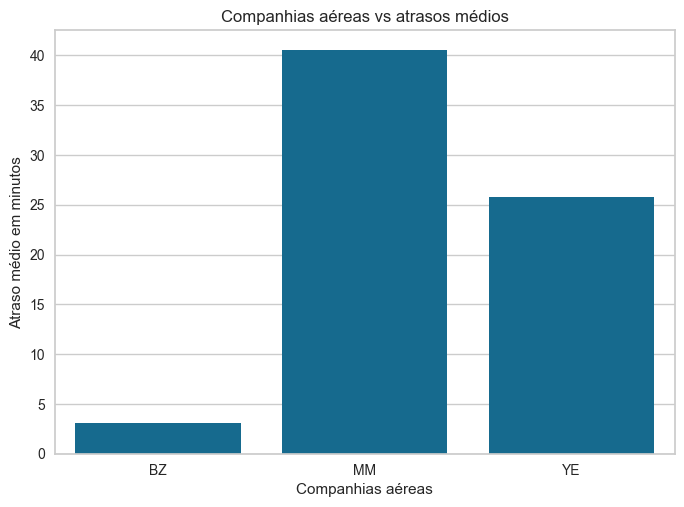

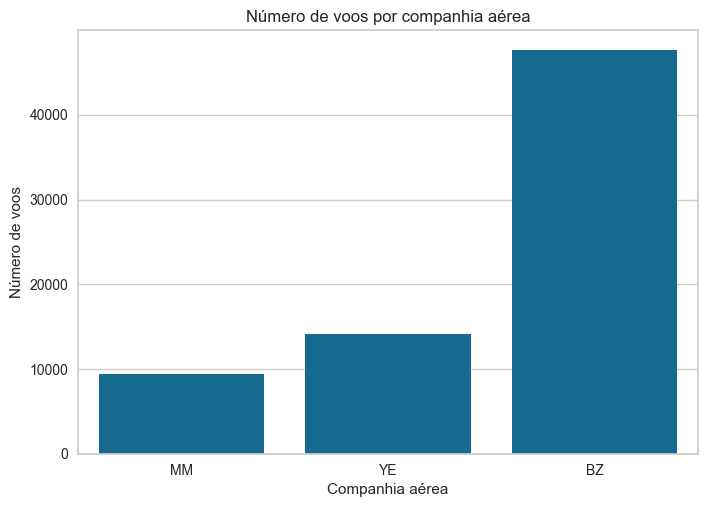

In [105]:
average_delay = dados.groupby('airline')['delay'].mean().reset_index()
sns.barplot(x='airline', y='delay', data=average_delay)
plt.title('Companhias aéreas vs atrasos médios')
plt.xlabel('Companhias aéreas')
plt.ylabel('Atraso médio em minutos')
plt.show()

sns.countplot(data=dados, x='airline')
plt.title('Número de voos por companhia aérea')
plt.xlabel('Companhia aérea')
plt.ylabel('Número de voos')
plt.show()

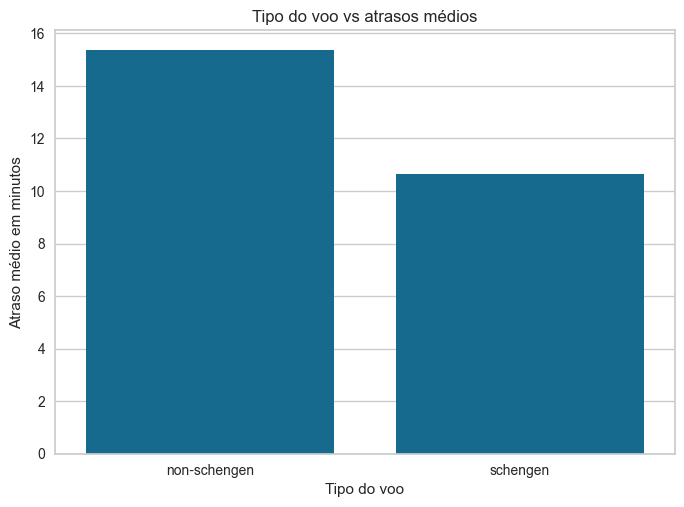

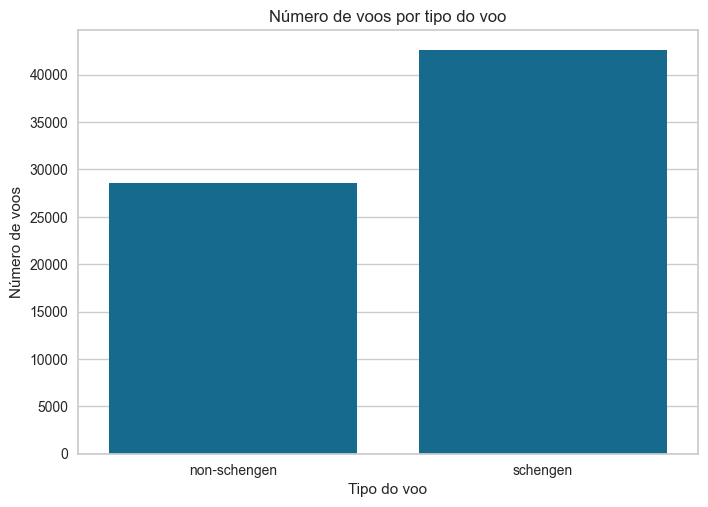

In [106]:
average_delay = dados.groupby('schengen')['delay'].mean().reset_index()
sns.barplot(x='schengen', y='delay', data=average_delay)
plt.title('Tipo do voo vs atrasos médios')
plt.xlabel('Tipo do voo')
plt.ylabel('Atraso médio em minutos')
plt.show()

sns.countplot(data=dados, x='schengen')
plt.title('Número de voos por tipo do voo')
plt.xlabel('Tipo do voo')
plt.ylabel('Número de voos')
plt.show()

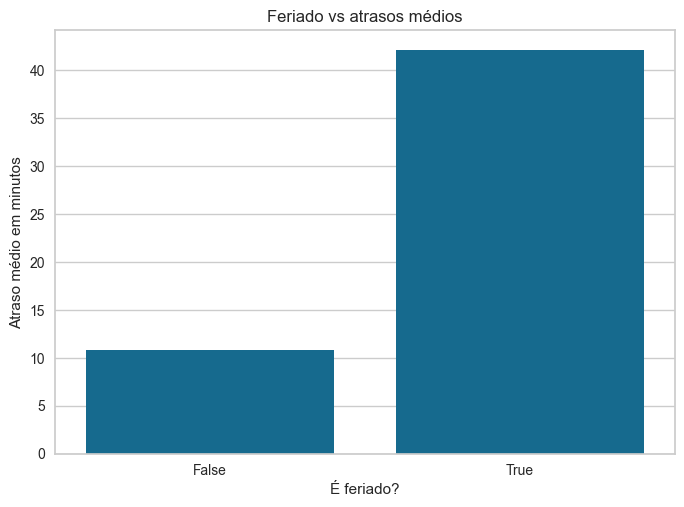

In [107]:
average_delay = dados.groupby('is_holiday')['delay'].mean().reset_index()
sns.barplot(x='is_holiday', y='delay', data=average_delay)
plt.title('Feriado vs atrasos médios')
plt.xlabel('É feriado?')
plt.ylabel('Atraso médio em minutos')
plt.show()

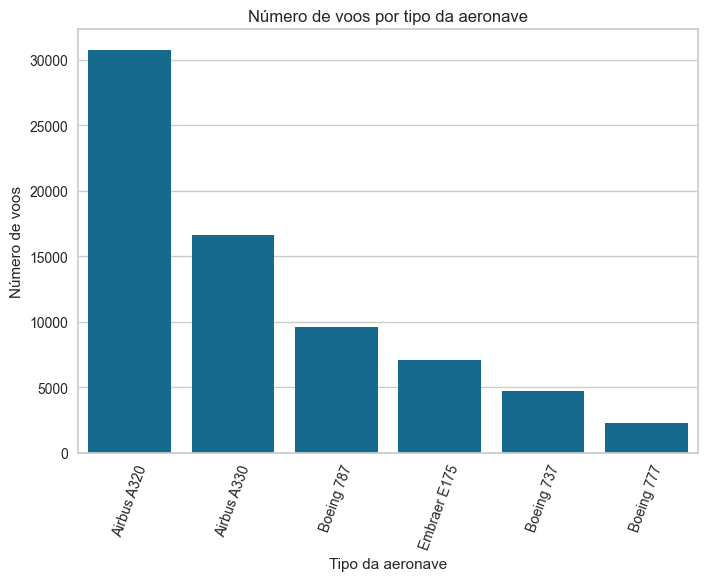

In [108]:
order = dados['aircraft_type'].value_counts().index
sns.countplot(data=dados, x='aircraft_type', order = order)
plt.title('Número de voos por tipo da aeronave')
plt.xticks(rotation=70)
plt.xlabel('Tipo da aeronave')
plt.ylabel('Número de voos')
plt.show()

### Analisando a distribuição dos dados

In [109]:
import numpy as np

def calcular_largura_bin(df, coluna):
    Q75, Q25 = np.percentile(df[coluna], [75 ,25])
    IQR = Q75 - Q25
    largura_bin = 2 * IQR * np.power(len(df[coluna]), -1/3)
    return largura_bin

<Axes: xlabel='arrival_time', ylabel='Count'>

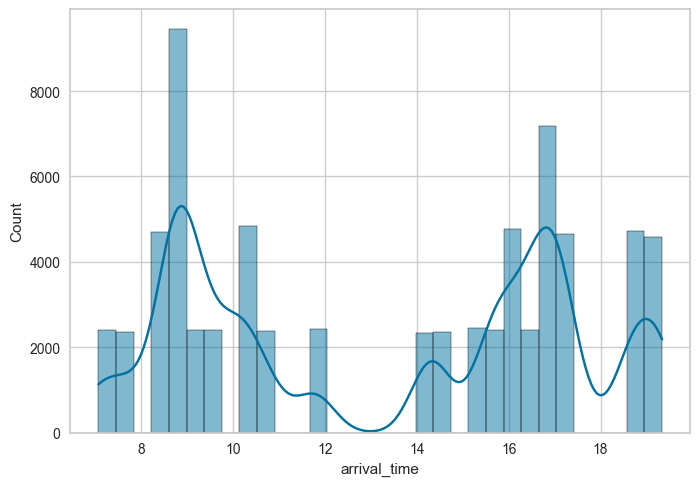

In [110]:
largura_bin_at = calcular_largura_bin(dados, 'arrival_time')

sns.histplot(data=dados, x='arrival_time', kde=True, binwidth=largura_bin_at)

<Axes: xlabel='departure_time', ylabel='Count'>

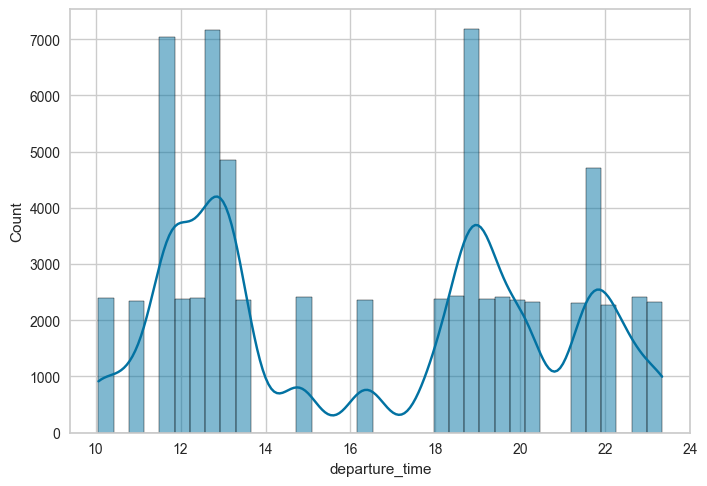

In [111]:
largura_bin_dt = calcular_largura_bin(dados, 'departure_time')

sns.histplot(data=dados, x='departure_time', kde=True, binwidth=largura_bin_dt)

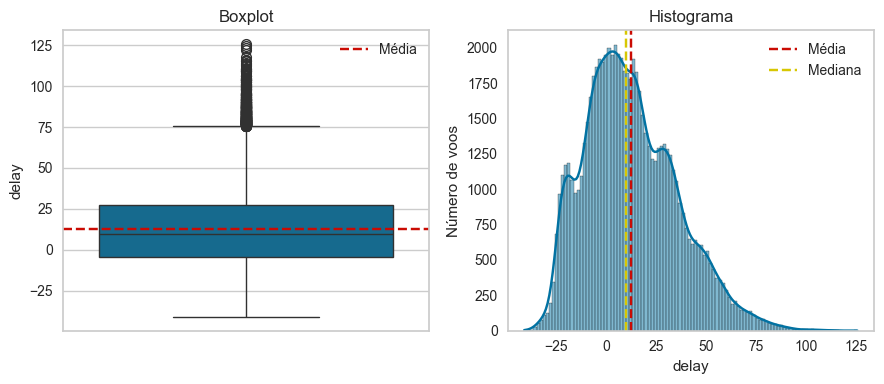

In [112]:
mean_delay = dados['delay'].mean()
median_delay = dados['delay'].median()

fig, axes = plt.subplots(1, 2, figsize=(9, 4))

sns.boxplot(data=dados, y='delay', ax=axes[0])
axes[0].set_title('Boxplot')

axes[0].axhline(y=mean_delay, color='r', linestyle='--', label='Média')
axes[0].legend()

largura_bin_delay = calcular_largura_bin(dados, 'delay')
sns.histplot(data=dados, x='delay', ax=axes[1], kde=True, binwidth=largura_bin_delay)
plt.ylabel('Número de voos')
plt.grid(False)
axes[1].set_title('Histograma')

axes[1].axvline(x=mean_delay, color='r', linestyle='--', label='Média')
axes[1].axvline(x=median_delay, color='y', linestyle='--', label='Mediana')
axes[1].legend()

plt.tight_layout()
plt.show()

## Feature engineering

In [113]:
dados['date'] = pd.to_datetime(dados['year'].astype(str) + '-' + (dados['day'] + 1).astype(str), format='%Y-%j')
dados.head()

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date
0,26,MM,Airbus A320,non-schengen,TCY,8.885071,10.885071,0,2010,False,70.205981,2010-01-01
1,10,YE,Airbus A320,non-schengen,TCY,8.939996,11.939996,0,2010,False,38.484609,2010-01-01
2,3,BZ,Embraer E175,schengen,TZF,18.635384,22.635384,0,2010,False,2.388305,2010-01-01
3,28,BZ,Airbus A330,non-schengen,EMM,15.967963,17.967963,0,2010,False,19.138491,2010-01-01
4,15,BZ,Airbus A330,non-schengen,FJB,16.571894,19.571894,0,2010,False,15.016271,2010-01-01


In [114]:
dados['is_weekend'] = dados['date'].dt.weekday.isin([5, 6])
dados.head()

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend
0,26,MM,Airbus A320,non-schengen,TCY,8.885071,10.885071,0,2010,False,70.205981,2010-01-01,False
1,10,YE,Airbus A320,non-schengen,TCY,8.939996,11.939996,0,2010,False,38.484609,2010-01-01,False
2,3,BZ,Embraer E175,schengen,TZF,18.635384,22.635384,0,2010,False,2.388305,2010-01-01,False
3,28,BZ,Airbus A330,non-schengen,EMM,15.967963,17.967963,0,2010,False,19.138491,2010-01-01,False
4,15,BZ,Airbus A330,non-schengen,FJB,16.571894,19.571894,0,2010,False,15.016271,2010-01-01,False


In [115]:
dados['day_name'] = dados['date'].dt.day_name()
dados.head()

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend,day_name
0,26,MM,Airbus A320,non-schengen,TCY,8.885071,10.885071,0,2010,False,70.205981,2010-01-01,False,Friday
1,10,YE,Airbus A320,non-schengen,TCY,8.939996,11.939996,0,2010,False,38.484609,2010-01-01,False,Friday
2,3,BZ,Embraer E175,schengen,TZF,18.635384,22.635384,0,2010,False,2.388305,2010-01-01,False,Friday
3,28,BZ,Airbus A330,non-schengen,EMM,15.967963,17.967963,0,2010,False,19.138491,2010-01-01,False,Friday
4,15,BZ,Airbus A330,non-schengen,FJB,16.571894,19.571894,0,2010,False,15.016271,2010-01-01,False,Friday


### Feature Encoding

In [116]:
dados.nunique()

flight_id            30
airline               3
aircraft_type         6
schengen              2
origin               10
arrival_time         30
departure_time       30
day                 365
year                 13
is_holiday            2
delay             71175
date               4745
is_weekend            2
day_name              7
dtype: int64

In [117]:
dados['is_holiday'].unique()

array([False,  True])

In [118]:
dados['schengen'] = dados['schengen'].replace({'non-schengen': 0, 'schengen': 1})
dados['is_holiday'] = dados['is_holiday'].replace({False: 0, True: 1})
dados['is_weekend'] = dados['is_weekend'].replace({False: 0, True: 1})
dados.head()

C:\Users\msred\AppData\Local\Temp\ipykernel_7952\2385380026.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dados['schengen'] = dados['schengen'].replace({'non-schengen': 0, 'schengen': 1})
C:\Users\msred\AppData\Local\Temp\ipykernel_7952\2385380026.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dados['is_holiday'] = dados['is_holiday'].replace({False: 0, True: 1})
C:\Users\msred\AppData\Local\Temp\ipykernel_7952\2385380026.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a futur

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend,day_name
0,26,MM,Airbus A320,0,TCY,8.885071,10.885071,0,2010,0,70.205981,2010-01-01,0,Friday
1,10,YE,Airbus A320,0,TCY,8.939996,11.939996,0,2010,0,38.484609,2010-01-01,0,Friday
2,3,BZ,Embraer E175,1,TZF,18.635384,22.635384,0,2010,0,2.388305,2010-01-01,0,Friday
3,28,BZ,Airbus A330,0,EMM,15.967963,17.967963,0,2010,0,19.138491,2010-01-01,0,Friday
4,15,BZ,Airbus A330,0,FJB,16.571894,19.571894,0,2010,0,15.016271,2010-01-01,0,Friday


In [119]:
variaveis_categoricas = ['airline', 'aircraft_type', 'origin', 'day_name']

In [120]:
df_encoded = pd.get_dummies(data=dados, columns=variaveis_categoricas, dtype=int)
df_encoded.head()

,flight_id,schengen,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend,...,origin_TCY,origin_TZF,origin_ZQO,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
0,26,0,8.885071,10.885071,0,2010,0,70.205981,2010-01-01,0,...,1,0,0,1,0,0,0,0,0,0
1,10,0,8.939996,11.939996,0,2010,0,38.484609,2010-01-01,0,...,1,0,0,1,0,0,0,0,0,0
2,3,1,18.635384,22.635384,0,2010,0,2.388305,2010-01-01,0,...,0,1,0,1,0,0,0,0,0,0
3,28,0,15.967963,17.967963,0,2010,0,19.138491,2010-01-01,0,...,0,0,0,1,0,0,0,0,0,0
4,15,0,16.571894,19.571894,0,2010,0,15.016271,2010-01-01,0,...,0,0,0,1,0,0,0,0,0,0


### Limpando os Dados

In [121]:
df_encoded[['arrival_time', 'departure_time']].corr()

,arrival_time,departure_time
arrival_time,1.000000,0.973797
departure_time,0.973797,1.000000


In [122]:
df_clean = df_encoded.drop(['flight_id', 'departure_time', 'day', 'year', 'date'], axis=1)
df_clean.head()

,schengen,arrival_time,is_holiday,delay,is_weekend,airline_BZ,airline_MM,airline_YE,aircraft_type_Airbus A320,aircraft_type_Airbus A330,...,origin_TCY,origin_TZF,origin_ZQO,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
0,0,8.885071,0,70.205981,0,0,1,0,1,0,...,1,0,0,1,0,0,0,0,0,0
1,0,8.939996,0,38.484609,0,0,0,1,1,0,...,1,0,0,1,0,0,0,0,0,0
2,1,18.635384,0,2.388305,0,1,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
3,0,15.967963,0,19.138491,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4,0,16.571894,0,15.016271,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


In [123]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

colunas_categoricas = ['airline', 'aircraft_type', 'origin', 'day_name']

one_hot_enc = make_column_transformer(
    (OneHotEncoder(handle_unknown = 'ignore'),
    colunas_categoricas),
    remainder='passthrough')

dados = one_hot_enc.fit_transform(dados)
dados = pd.DataFrame(dados, columns=one_hot_enc.get_feature_names_out())
dados

,onehotencoder__airline_BZ,onehotencoder__airline_MM,onehotencoder__airline_YE,onehotencoder__aircraft_type_Airbus A320,onehotencoder__aircraft_type_Airbus A330,onehotencoder__aircraft_type_Boeing 737,onehotencoder__aircraft_type_Boeing 777,onehotencoder__aircraft_type_Boeing 787,onehotencoder__aircraft_type_Embraer E175,onehotencoder__origin_AUZ,...,remainder__flight_id,remainder__schengen,remainder__arrival_time,remainder__departure_time,remainder__day,remainder__year,remainder__is_holiday,remainder__delay,remainder__date,remainder__is_weekend
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,26,0,8.885071,10.885071,0,2010,0,70.205981,2010-01-01,0
1,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10,0,8.939996,11.939996,0,2010,0,38.484609,2010-01-01,0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,3,1,18.635384,22.635384,0,2010,0,2.388305,2010-01-01,0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,28,0,15.967963,17.967963,0,2010,0,19.138491,2010-01-01,0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,15,0,16.571894,19.571894,0,2010,0,15.016271,2010-01-01,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71170,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,3,1,18.635384,22.635384,364,2022,1,25.677277,2022-12-31,1
71171,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,17,0,16.718722,21.718722,364,2022,1,52.624348,2022-12-31,1
71172,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,7,1,8.564949,13.564949,364,2022,1,56.16708,2022-12-31,1
71173,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5,1,9.344097,12.344097,364,2022,1,56.758844,2022-12-31,1


## Seleção e validação do modelo

### Treinamento do DummyRegressor

In [124]:
X = df_clean.drop(['delay'], axis=1)
y = df_clean['delay']

In [125]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [126]:
from sklearn.dummy import DummyRegressor

model_dummy = DummyRegressor()
model_dummy.fit(X_train, y_train)

DummyRegressor()

In [127]:
y_pred_dummy = model_dummy.predict(X_test)

In [128]:
from sklearn.metrics import mean_absolute_error, r2_score, root_mean_squared_error

def calcular_metricas_regressao(y_test, y_pred):

    rmse = root_mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    metricas = {
        'Raiz do Erro Quadrático Médio': round(rmse, 4),
        'Erro Absoluto Médio': round(mae, 4),
        'R2 Score': round(r2, 4)
    }

    return metricas


In [129]:
calcular_metricas_regressao(y_test, y_pred_dummy)

{'Raiz do Erro Quadrático Médio': 23.2241,
 'Erro Absoluto Médio': 18.6127,
 'R2 Score': -0.0}

In [130]:
from sklearn.dummy import DummyRegressor

estrategias = ["mean", "median", ("quantile", 0.25), ("constant", 10.0)]

resultados = {}

for estrategia in estrategias:
    if isinstance(estrategia, tuple):
        estrategia, valor = estrategia
        if estrategia == "quantile":
            model_dummy = DummyRegressor(strategy=estrategia, quantile=valor)
        else:
            model_dummy = DummyRegressor(strategy=estrategia, constant=valor)
    else:
        model_dummy = DummyRegressor(strategy=estrategia)

    model_dummy.fit(X_train, y_train)

    y_pred_dummy = model_dummy.predict(X_test)

    metricas = calcular_metricas_regressao(y_test, y_pred_dummy)

    resultados[estrategia] = metricas

for estrategia, metricas in resultados.items():
    print(f"Estratégia: {estrategia}")
    for metrica, valor in metricas.items():
        print(f"{metrica}: {valor}")
    print("\n")

Estratégia: mean
Raiz do Erro Quadrático Médio: 23.2241
Erro Absoluto Médio: 18.6127
R2 Score: -0.0


Estratégia: median
Raiz do Erro Quadrático Médio: 23.4038
Erro Absoluto Médio: 18.4891
R2 Score: -0.0155


Estratégia: quantile
Raiz do Erro Quadrático Médio: 28.7943
Erro Absoluto Médio: 22.0382
R2 Score: -0.5372


Estratégia: constant
Raiz do Erro Quadrático Médio: 23.3699
Erro Absoluto Médio: 18.4893
R2 Score: -0.0126




### Treinamento do RandomForestRegressor

In [131]:
from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor(max_depth=5, random_state=42)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)
calcular_metricas_regressao(y_test, y_pred_rf)

{'Raiz do Erro Quadrático Médio': 13.7301,
 'Erro Absoluto Médio': 11.0138,
 'R2 Score': 0.6505}

c:\Users\msred\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


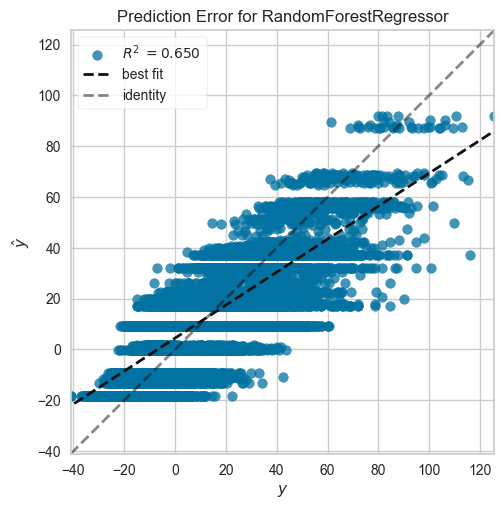

In [132]:
from yellowbrick.regressor import prediction_error

visualizer = prediction_error(model_rf, X_train, y_train, X_test, y_test)

c:\Users\msred\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


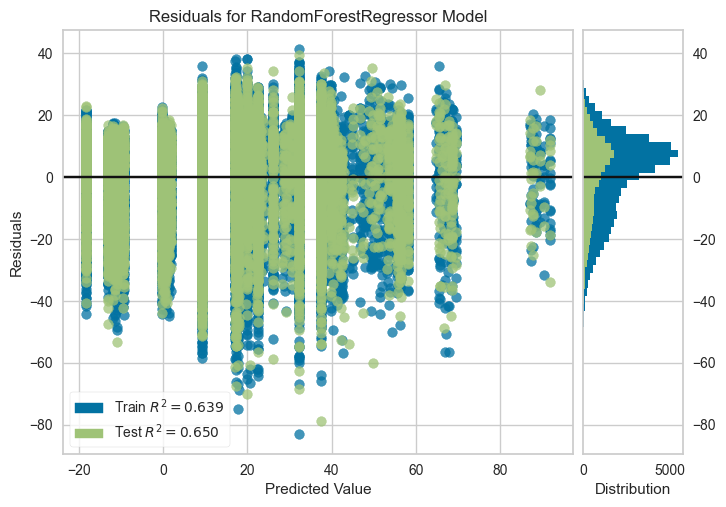

In [133]:
from yellowbrick.regressor import residuals_plot

viz = residuals_plot(model_rf, X_train, y_train, X_test, y_test)

### Validação cruzada

In [134]:
from sklearn.model_selection import KFold, cross_validate

scoring = {
    'mae': 'neg_mean_absolute_error',
    'rmse': 'neg_root_mean_squared_error',
    'r2': 'r2'
}

cv = KFold(n_splits=5, shuffle=True, random_state=42)

cv_results = cross_validate(model_rf, X_train, y_train, cv=cv, scoring=scoring)
cv_results

{'fit_time': array([2.99689102, 3.41587448, 2.88187981, 2.79335451, 2.71858239]),
 'score_time': array([0.06683278, 0.07202506, 0.05606699, 0.05740833, 0.04806471]),
 'test_mae': array([-11.07421449, -11.30328674, -11.05630068, -11.14454886,
        -11.17423931]),
 'test_rmse': array([-13.76668658, -14.04881475, -13.79310018, -13.87672957,
        -13.9303929 ]),
 'test_r2': array([0.64679676, 0.62433581, 0.64536956, 0.64090813, 0.63477298])}

In [135]:
for metric in scoring.keys():
    scores = cv_results[f'test_{metric}']
    mean_score = "{:.3f}".format(scores.mean())
    std_score = "{:.3f}".format(scores.std())

    print(f"{metric.upper()} Scores: {[f'{val:.3f}' for val in scores]}")
    print(f"{metric.upper()} Média: {mean_score}, Std: {std_score}")
    print('----------------------------------------------------------------')

MAE Scores: ['-11.074', '-11.303', '-11.056', '-11.145', '-11.174']
MAE Média: -11.151, Std: 0.088
----------------------------------------------------------------
RMSE Scores: ['-13.767', '-14.049', '-13.793', '-13.877', '-13.930']
RMSE Média: -13.883, Std: 0.101
----------------------------------------------------------------
R2 Scores: ['0.647', '0.624', '0.645', '0.641', '0.635']
R2 Média: 0.638, Std: 0.008
----------------------------------------------------------------


## Otimização de hiperparâmetros

### Seleção de recursos

c:\Users\msred\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


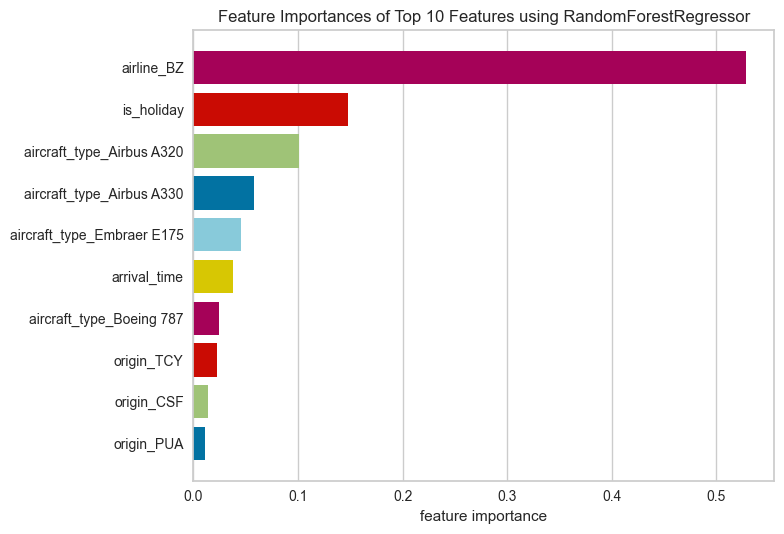

<Axes: title={'center': 'Feature Importances of Top 10 Features using RandomForestRegressor'}, xlabel='feature importance'>

In [136]:
from yellowbrick.model_selection import FeatureImportances

viz = FeatureImportances(model_rf, relative=False, topn=10)
viz.fit(X_train, y_train)
viz.show()

In [137]:
importances = model_rf.feature_importances_

feature_importances = pd.DataFrame({'Features': X.columns, 'Importances': importances})
feature_importances.sort_values('Importances', ascending=False)

,Features,Importances
4,airline_BZ,0.528604
2,is_holiday,0.147833
7,aircraft_type_Airbus A320,0.100719
8,aircraft_type_Airbus A330,0.058221
12,aircraft_type_Embraer E175,0.045619
1,arrival_time,0.037614
11,aircraft_type_Boeing 787,0.024663
20,origin_TCY,0.022120
15,origin_CSF,0.013979
19,origin_PUA,0.011385


In [138]:
results_df = pd.DataFrame(index=['RMSE', 'MAE', 'R2'])

model_selected_features = RandomForestRegressor(random_state=42, max_depth=5)

for count in [1, 5, 10, 15, 20, 25, 30]:
    selected_features = feature_importances['Features'].values[:count]

    X_train_selected = X_train[selected_features]
    X_test_selected = X_test[selected_features]

    model_selected_features.fit(X_train_selected, y_train)

    y_pred = model_selected_features.predict(X_test_selected)

    metricas = calcular_metricas_regressao(y_test, y_pred)

    results_df[count] = list(metricas.values())

results_df

,1,5,10,15,20,25,30
RMSE,23.0970,14.9389,14.3002,13.7406,13.7387,13.7284,13.7301
MAE,18.5637,12.0211,11.4904,11.0253,11.0242,11.0127,11.0138
R2,0.0109,0.5862,0.6208,0.6499,0.6500,0.6506,0.6505


In [139]:
results_df = pd.DataFrame(index=['RMSE', 'MAE', 'R2'])

model_selected_features = RandomForestRegressor(random_state=42, max_depth=5)

for count in range(10, 16):
    selected_features = feature_importances['Features'].values[:count]

    X_train_selected = X_train[selected_features]
    X_test_selected = X_test[selected_features]

    model_selected_features.fit(X_train_selected, y_train)

    y_pred = model_selected_features.predict(X_test_selected)

    metricas = calcular_metricas_regressao(y_test, y_pred)

    results_df[count] = list(metricas.values())

results_df

,10,11,12,13,14,15
RMSE,14.3002,14.3002,14.3939,13.7410,13.7410,13.7406
MAE,11.4904,11.4904,11.4096,11.0256,11.0254,11.0253
R2,0.6208,0.6208,0.6159,0.6499,0.6499,0.6499


In [140]:
selected_features = feature_importances['Features'].values[:13]

X_select_features = X[selected_features]

In [141]:
X_train, X_test, y_train, y_test = train_test_split(X_select_features, y, random_state=42)

### Otimizando os hiperparâmetros com o GridSearchCV

In [142]:
param_grid = {
      'max_depth': [5, 10, 15],
      'min_samples_leaf': [1, 2, 3],
      'min_samples_split': [2, 4, 6],
      'n_estimators': [100, 150, 200]
 }

In [143]:
from sklearn.model_selection import GridSearchCV

In [148]:
cv = KFold(n_splits=5, shuffle=True, random_state=42)

model_grid = GridSearchCV(RandomForestRegressor(random_state=42), param_grid=param_grid,
             scoring='r2', cv=cv, n_jobs=-1)

model_grid.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [100, 150, 200]},
             scoring='r2')

In [149]:
model_grid.best_params_

{'max_depth': 10,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 200}

In [150]:
y_pred_model_grid = model_grid.predict(X_test)
metricas_model_grid = calcular_metricas_regressao(y_test, y_pred_model_grid)
metricas_model_grid

{'Raiz do Erro Quadrático Médio': 13.2635,
 'Erro Absoluto Médio': 10.6731,
 'R2 Score': 0.6738}

In [151]:
results_df['model_grid'] = list(metricas_model_grid.values())
results_df

,10,11,12,13,14,15,model_grid
RMSE,14.3002,14.3002,14.3939,13.7410,13.7410,13.7406,13.2635
MAE,11.4904,11.4904,11.4096,11.0256,11.0254,11.0253,10.6731
R2,0.6208,0.6208,0.6159,0.6499,0.6499,0.6499,0.6738


### Salvando o modelo

In [152]:
import pickle

In [153]:
try:
  with open('model_producao.pkl', 'wb') as file:
    pickle.dump(model_grid.best_estimator_, file)
  print('Modelo salvo com sucesso!!!')
except Exception as e:
  print('Ocorreu um erro ao salvar o modelo: ', str(e))

Modelo salvo com sucesso!!!


# 📋 Documentação do Processo de Previsão de Atrasos de Voos

## 🎯 Objetivo
Desenvolver um modelo de Machine Learning para prever atrasos de voos utilizando técnicas de análise exploratória, feature engineering e otimização de hiperparâmetros.

---

## 📊 Passo a Passo Detalhado

### 1. **🔍 Análise Exploratória de Dados (EDA)**

#### 1.1 Carregamento e Inspeção Inicial
**Conceito:** A Análise Exploratória de Dados (EDA) é o processo de investigação inicial dos dados para descobrir padrões, detectar anomalias e compreender a estrutura subjacente dos dados.

**Implementação:**
- **Pandas:** Biblioteca fundamental para manipulação de dados estruturados em Python
  - `pd.read_csv()`: Leitura eficiente de arquivos CSV
  - `head()` e `tail()`: Visualização das primeiras e últimas observações
  - `shape`: Dimensionalidade do dataset (linhas × colunas)
  - `info()`: Tipos de dados, valores nulos e uso de memória
  - `describe()`: Estatísticas descritivas (média, mediana, quartis, desvio padrão)

**Por que é importante:**
- Identifica problemas de qualidade dos dados
- Revela a distribuição e características das variáveis
- Informa decisões sobre preprocessing necessário

#### 1.2 Visualizações Exploratórias
**Conceito:** Visualização de dados é fundamental para compreender padrões complexos que não são óbvios apenas com estatísticas numéricas.

**Ferramentas utilizadas:**
- **Matplotlib:** Biblioteca base para criação de gráficos em Python
- **Seaborn:** Interface de alto nível baseada em matplotlib para visualizações estatísticas

**Análises realizadas:**
- **Análise categórica:** Comparação de atrasos médios entre companhias aéreas
- **Análise de frequência:** Distribuição de voos por categoria
- **Análise temporal:** Impacto de feriados nos padrões de atraso
- **Análise operacional:** Tipos de aeronaves e seus padrões de uso

### 2. **📈 Análise Estatística da Distribuição**

#### 2.1 Regra de Freedman-Diaconis
**Conceito:** Método estatístico para determinar o número ideal de bins em histogramas.

**Fórmula implementada:**
```
largura_bin = 2 × IQR × n^(-1/3)
```
Onde:
- IQR = Q75 - Q25 (Intervalo Interquartil)
- n = número de observações

**Vantagens:**
- Adapta-se automaticamente ao tamanho da amostra
- Resistente a outliers
- Otimiza a visualização da distribuição real dos dados

#### 2.2 Análise de Distribuições
**Histogramas:** Revelam a forma da distribuição (normal, assimétrica, multimodal)
**Boxplots:** Identificam outliers e mostram quartis, mediana e amplitude
**Estatísticas de posição:** Média vs. mediana para detectar assimetria

### 3. **🛠️ Feature Engineering Avançado**

#### 3.1 Engenharia de Features Temporais
**Conceito:** Criação de variáveis que capturam padrões temporais complexos.

**Transformações implementadas:**
- **Conversão datetime:** Utilização de `pd.to_datetime()` com formato juliano
- **Extração de componentes temporais:**
  - `dt.weekday`: Números de 0-6 representando dias da semana
  - `dt.day_name()`: Nomes dos dias para análise categórica
  - `isin([5,6])`: Identificação de fins de semana (sábado e domingo)

**Justificativa científica:**
- **Sazonalidade:** Padrões de tráfego aéreo variam por dia da semana
- **Comportamento humano:** Viagens de negócios vs. lazer têm padrões distintos
- **Operações aeroportuárias:** Capacidade e congestionamento variam temporalmente

#### 3.2 Domain Knowledge Integration
**Fins de semana:** Tipicamente menos voos de negócios, mais voos de lazer
**Feriados:** Aumento de tráfego e potencial para atrasos
**Dias da semana:** Segunda e sexta-feira são críticos para viagens de negócios

### 4. **🔄 Encoding de Variáveis Categóricas**

#### 4.1 Teoria do Encoding
**Problema:** Algoritmos de ML operam apenas com dados numéricos
**Solução:** Transformar variáveis categóricas em representações numéricas

#### 4.2 Técnicas Implementadas

**Label Encoding (Binário):**
- Variáveis: `schengen`, `is_holiday`, `is_weekend`
- Transformação: False/True → 0/1
- Adequado para: variáveis binárias ou ordinais

**One-Hot Encoding:**
- Variáveis: `airline`, `aircraft_type`, `origin`, `day_name`
- Criação de variáveis dummy (0/1) para cada categoria
- **Vantagem:** Não assume ordem entre categorias
- **Desvantagem:** Aumenta dimensionalidade

**Implementações comparadas:**
- `pd.get_dummies()`: Simples e direto
- `OneHotEncoder`: Maior controle e compatibilidade com pipelines sklearn

### 5. **🧹 Data Cleaning e Preparação**

#### 5.1 Feature Selection Preliminar
**Critérios de remoção:**
- **Identificadores únicos:** `flight_id` (não tem valor preditivo)
- **Redundância temporal:** `day`, `year` (substituídos por features engineered)
- **Vazamento de dados:** `departure_time` (altamente correlacionado com target)
- **Features derivadas:** `date` (mantemos apenas suas derivações)

#### 5.2 Análise de Correlação
**Conceito:** Identificação de multicolinearidade entre variáveis explicativas
**Implementação:** Matriz de correlação de Pearson
**Decisão:** Remover `departure_time` por alta correlação com `arrival_time`

### 6. **⚙️ Preparação para Machine Learning**

#### 6.1 Separação Features/Target
**Design Pattern:** Separação clara entre variáveis explicativas (X) e variável resposta (y)
- **X:** Matriz de features após todas as transformações
- **y:** Vetor target (atraso em minutos) - variável contínua para regressão

#### 6.2 Divisão Treino/Teste
**Conceito:** Holdout method para avaliação não enviesada
- **Proporção:** 75% treino, 25% teste (padrão sklearn)
- **random_state=42:** Garantia de reproducibilidade
- **Estratificação:** Não aplicável em regressão (usado em classificação)

### 7. **📏 Estabelecimento de Baseline**

#### 7.1 DummyRegressor - Importância dos Baselines
**Conceito:** Modelos simples que servem como referência mínima de performance
**Filosofia:** "Um modelo complexo só é útil se superar modelos simples"

**Estratégias implementadas:**
- **Mean:** Prediz sempre a média dos valores de treino
- **Median:** Prediz sempre a mediana (robusta a outliers)
- **Quantile (0.25):** Prediz sempre o 1º quartil
- **Constant (10.0):** Prediz sempre um valor fixo escolhido

#### 7.2 Métricas de Avaliação
**RMSE (Root Mean Square Error):**
- Fórmula: √(Σ(y_true - y_pred)²/n)
- Unidade: mesma da variável target (minutos)
- Penaliza erros grandes quadraticamente

**MAE (Mean Absolute Error):**
- Fórmula: Σ|y_true - y_pred|/n
- Mais robusto a outliers que RMSE
- Interpretação direta em minutos de erro

**R² (Coeficiente de Determinação):**
- Fórmula: 1 - SS_res/SS_tot
- Varia de -∞ a 1 (1 = predição perfeita)
- Representa % da variância explicada pelo modelo

### 8. **🌲 Random Forest - Algoritmo Principal**

#### 8.1 Teoria do Random Forest
**Conceito:** Ensemble method que combina múltiplas árvores de decisão
**Vantagens:**
- Redução de overfitting vs. árvores individuais
- Captura interações não-lineares
- Fornece importância de features
- Robusto a outliers e dados desbalanceados

#### 8.2 Hiperparâmetros Iniciais
- **max_depth=5:** Limita profundidade para evitar overfitting
- **random_state=42:** Reproducibilidade
- **n_estimators=100:** Número padrão de árvores

#### 8.3 Visualização com Yellowbrick
**Prediction Error Plot:**
- Compara valores preditos vs. reais
- Linha diagonal = predição perfeita
- Dispersão indica qualidade do modelo

**Residuals Plot:**
- Analisa padrões nos erros
- Resíduos aleatórios = modelo bem ajustado
- Padrões indicam problemas (heterocedasticidade, não-linearidade)

### 9. **✅ Validação Cruzada Robusta**

#### 9.1 K-Fold Cross Validation
**Conceito:** Técnica para estimativa mais robusta da performance
**Implementação:** 5-fold CV com shuffle
- Divide dados em 5 partes
- Treina em 4 partes, testa em 1
- Repete 5 vezes, cada parte serve como teste uma vez

**Vantagens:**
- Utiliza todos os dados para treino e teste
- Reduz variância da estimativa de performance
- Detecta overfitting

#### 9.2 Métricas Negativas no Sklearn
**Convenção:** sklearn usa scores negativos para loss functions
- `neg_mean_absolute_error`
- `neg_root_mean_squared_error`
- `r2` permanece positivo (maior é melhor)

### 10. **🎯 Feature Selection Científica**

#### 10.1 Importância de Features em Random Forest
**Método Gini Importance:**
- Baseado na redução de impureza em cada split
- Normalizado para somar 1.0
- Indica contribuição relativa de cada feature

#### 10.2 Seleção Sequencial
**Metodologia:**
1. Ordenar features por importância
2. Treinar modelos com 1, 5, 10, 15, 20, 25, 30 features
3. Avaliar performance vs. complexidade
4. Refinamento fino entre 10-15 features
5. Seleção final: 13 features (sweet spot performance/complexidade)

**Princípio:** Lei de Pareto - 80% da performance com 20% das features

### 11. **🔧 Hyperparameter Optimization**

#### 11.1 Grid Search - Busca Exaustiva
**Conceito:** Avaliação sistemática de todas as combinações de hiperparâmetros
**Hiperparâmetros otimizados:**

- **max_depth [5, 10, 15]:** Controla complexidade/overfitting
- **min_samples_leaf [1, 2, 3]:** Regularização adicional
- **min_samples_split [2, 4, 6]:** Controla divisões das árvores
- **n_estimators [100, 150, 200]:** Número de árvores no ensemble

#### 11.2 Configuração Avançada
- **scoring='r2':** Métrica de otimização
- **cv=5:** Cross-validation para cada combinação
- **n_jobs=-1:** Paralelização para acelerar busca
- **Espaço de busca:** 3×3×3×3 = 81 combinações

### 12. **💾 Model Persistence e Deploy**

#### 12.1 Serialização com Pickle
**Conceito:** Conversão de objetos Python para formato binário
**Vantagens:**
- Preserva estado completo do modelo
- Carregamento rápido para predições
- Compatibilidade com ambiente de produção

#### 12.2 Best Practices de Deploy
- **Versionamento:** Salvar metadados do modelo
- **Validação:** Testar carregamento após salvamento
- **Monitoramento:** Preparar para acompanhamento em produção
- **Rollback:** Manter versões anteriores para contingência

---

## 🛠️ Ferramentas e Bibliotecas - Deep Dive

### 📊 Stack de Análise de Dados

#### **Pandas - O Swiss Army Knife dos Dados**
**Conceito:** Biblioteca fundamental construída sobre NumPy para manipulação de dados estruturados
**Estruturas principais:**
- **DataFrame:** Estrutura bidimensional com rótulos (similar a uma planilha)
- **Series:** Array unidimensional com rótulos

**Funcionalidades utilizadas:**
- **I/O Operations:** `read_csv()` com parsing inteligente de tipos
- **Data Exploration:** `head()`, `tail()`, `info()`, `describe()`
- **Data Transformation:** `groupby()`, `apply()`, `replace()`
- **Feature Engineering:** `pd.to_datetime()`, `dt.accessor`
- **Missing Data:** Detecção e tratamento de valores nulos

#### **NumPy - Computação Científica**
**Conceito:** Base matemática para computação científica em Python
**Contribuições no projeto:**
- **Operações estatísticas:** `np.percentile()` para cálculo de quartis
- **Funções matemáticas:** `np.power()` para regra de Freedman-Diaconis
- **Arrays eficientes:** Base para todas as operações pandas/sklearn

### 📈 Ecossistema de Visualização

#### **Matplotlib - Engine de Visualização**
**Arquitetura:** Sistema de layers inspirado no MATLAB
- **Figure:** Container principal
- **Axes:** Área de plotagem
- **Artists:** Elementos visuais (linhas, texto, legendas)

**Técnicas utilizadas:**
- **Subplots:** Múltiplos gráficos em uma figura
- **Customização:** Cores, estilos, anotações
- **Layout management:** `tight_layout()` para otimização automática

#### **Seaborn - Estatística Visual**
**Filosofia:** "Make beautiful statistical graphics easily"
**Vantagens sobre matplotlib:**
- **Statistical plotting:** Gráficos estatísticos com uma linha de código
- **Built-in themes:** Estilos profissionais automáticos
- **Data-aware:** Trabalha diretamente com DataFrames

**Plots utilizados:**
- **barplot():** Comparações categóricas com intervalos de confiança
- **countplot():** Distribuições de frequência
- **histplot():** Distribuições com KDE (Kernel Density Estimation)
- **boxplot():** Estatísticas robustas e outliers

#### **Yellowbrick - ML Visualization**
**Conceito:** Biblioteca especializada em visualização para Machine Learning
**Design Pattern:** Scikit-learn compatible visualizers
**Implementação:** Padrão fit-transform-visualize

**Visualizers utilizados:**
- **PredictionError:** Scatter plot valores reais vs preditos
- **ResidualsPlot:** Análise de resíduos para diagnóstico de modelo
- **FeatureImportances:** Ranking visual de importância de features

### 🤖 Machine Learning Ecosystem

#### **Scikit-learn - ML Industrial Grade**
**Filosofia:** API consistente, documentação excelente, implementações robustas
**Design Principles:**
- **Consistency:** Todos os estimadores seguem fit/predict pattern
- **Inspection:** Parâmetros acessíveis via atributos
- **Limited object hierarchy:** Evita complexidade desnecessária
- **Composition:** Componentes combinables (pipelines)

#### **Algoritmos e Técnicas Implementadas:**

**RandomForestRegressor:**
- **Tipo:** Ensemble method baseado em bagging
- **Base learners:** Decision trees com randomização adicional
- **Hiperparâmetros chave:**
  - `n_estimators`: Número de árvores (bias-variance tradeoff)
  - `max_depth`: Profundidade máxima (controle de overfitting)
  - `min_samples_split`: Mínimo de amostras para split
  - `min_samples_leaf`: Mínimo de amostras por folha
- **Vantagens:** Robusto, paralelo, feature importance nativa

**DummyRegressor:**
- **Propósito:** Baseline models para comparação
- **Estratégias:** Estatísticas simples sem aprendizado
- **Importância:** Sanity check - modelo complexo deve superar baseline

**GridSearchCV:**
- **Conceito:** Hyperparameter optimization via busca exaustiva
- **Metodologia:** Cross-validation para cada combinação
- **Paralelização:** Múltiplos cores para acelerar busca
- **Output:** Melhor combinação + estimador treinado

**Cross-Validation:**
- **KFold:** Divisão determinística em k partições
- **Shuffle:** Randomização para reduzir bias de ordem
- **Scoring:** Múltiplas métricas para avaliação abrangente

#### **Métricas de Avaliação - Fundamentos Teóricos:**

**RMSE (Root Mean Square Error):**
- **Fórmula:** √(Σ(yᵢ - ŷᵢ)²/n)
- **Propriedades:** 
  - Mesma unidade que target
  - Penaliza erros grandes quadraticamente
  - Sensível a outliers
- **Interpretação:** Desvio padrão dos erros de predição

**MAE (Mean Absolute Error):**
- **Fórmula:** Σ|yᵢ - ŷᵢ|/n
- **Propriedades:**
  - Mediana dos erros absolutos
  - Robusto a outliers
  - Interpretação intuitiva
- **Uso:** Quando outliers não devem dominar avaliação

**R² (Coefficient of Determination):**
- **Fórmula:** 1 - SS_res/SS_tot
- **Interpretação:** Proporção da variância explicada
- **Range:** (-∞, 1] onde 1 = predição perfeita
- **Baseline:** R² = 0 equivale a sempre predizer a média

### 💾 Persistência e Deployment

#### **Pickle - Serialização Python**
**Conceito:** Protocolo binário para serialização de objetos Python
**Vantagens:**
- **Fidelidade:** Preserva estado completo do objeto
- **Performance:** Serialização/deserialização rápida
- **Simplicidade:** API minimal (dump/load)

**Limitações e considerações:**
- **Security:** Nunca carregar pickle de fontes não confiáveis
- **Versioning:** Compatibilidade entre versões Python/bibliotecas
- **Alternatives:** joblib (para arrays grandes), ONNX (interoperabilidade)

---

## 📋 Metodologia e Frameworks Teóricos

### 🔄 CRISP-DM (Cross-Industry Standard Process for Data Mining)

#### **1. Business Understanding**
**Conceito:** Compreensão do problema de negócio e tradução para problema de ML
**Neste projeto:**
- **Domain:** Aviação civil e gestão operacional
- **Problem Type:** Regressão (predição de valor contínuo)
- **Business Impact:** Redução de custos operacionais e melhoria da experiência do passageiro
- **Success Metrics:** Precisão de predição medida por RMSE e R²

#### **2. Data Understanding**
**Fase crítica:** 80% do sucesso de projetos de Data Science
**Atividades implementadas:**
- **Data Collection:** Análise do dataset flights.csv
- **Data Description:** Inventário de variáveis e tipos
- **Data Exploration:** EDA com visualizações e estatísticas
- **Data Quality Assessment:** Identificação de missing values, outliers, inconsistências

#### **3. Data Preparation**
**Conceito:** Transformação de dados brutos em formato adequado para ML
**Técnicas aplicadas:**
- **Feature Engineering:** Criação de variáveis temporais
- **Feature Encoding:** Transformação categórica → numérica
- **Feature Selection:** Remoção de variáveis irrelevantes
- **Data Cleaning:** Tratamento de inconsistências

#### **4. Modeling**
**Estratégia:** Abordagem iterativa com múltiplas técnicas
- **Baseline Models:** DummyRegressor para referência
- **Algorithm Selection:** Random Forest (ensemble method)
- **Hyperparameter Tuning:** GridSearchCV sistemático
- **Model Comparison:** Análise comparativa de performance

#### **5. Evaluation**
**Framework de avaliação multi-dimensional:**
- **Statistical Validation:** Cross-validation k-fold
- **Multiple Metrics:** RMSE, MAE, R² para perspectivas diferentes
- **Visual Diagnosis:** Residual plots, prediction error plots
- **Business Validation:** Interpretação dos resultados no contexto operacional

#### **6. Deployment**
**Preparação para produção:**
- **Model Serialization:** Pickle para persistência
- **Version Control:** Salvamento do modelo final
- **Documentation:** Este próprio notebook como documentação

### 🎯 Metodologias de Machine Learning Aplicadas

#### **Ensemble Learning Theory**
**Random Forest como Ensemble Method:**
- **Bagging (Bootstrap Aggregating):** Redução de variância
- **Random Feature Selection:** Redução de correlação entre árvores
- **Majority Voting:** Agregação de predições para robustez
- **Bias-Variance Tradeoff:** Otimização através de múltiplos weak learners

#### **Cross-Validation Strategy**
**K-Fold Cross-Validation (k=5):**
- **Stratified Approach:** Não aplicável em regressão
- **Temporal Considerations:** Shuffle=True (dados não têm ordem temporal crítica)
- **Variance Reduction:** Múltiplas estimativas de performance
- **Overfitting Detection:** Comparação treino vs. validação

#### **Feature Engineering Methodology**
**Domain-Driven Feature Creation:**
- **Temporal Features:** Captura de sazonalidade e padrões cíclicos
- **Categorical Encoding:** Preservação de informação sem assumir ordem
- **Dimensionality Management:** Balanceamento entre informação e complexidade

#### **Hyperparameter Optimization Philosophy**
**Grid Search vs. Random Search vs. Bayesian Optimization:**
- **Grid Search:** Busca exaustiva (escolhida pela interpretabilidade)
- **Computational Cost:** 81 combinações com 5-fold CV = 405 modelos treinados
- **Parameter Ranges:** Baseados em literature review e experiência prática

### 🔬 Fundamentos Estatísticos

#### **Bias-Variance Decomposition**
**Conceito fundamental:** Erro total = Bias² + Variance + Irreducible Error
- **High Bias:** Underfitting (modelos muito simples)
- **High Variance:** Overfitting (modelos muito complexos)
- **Random Forest:** Reduz variance mantendo bias baixo

#### **Regularization Techniques**
**Implementadas via hiperparâmetros Random Forest:**
- **max_depth:** Limita complexidade das árvores individuais
- **min_samples_split/leaf:** Força generalização através de mínimos estatísticos
- **Feature subsampling:** Reduz correlação e overfitting

#### **Statistical Significance**
**Cross-Validation Statistical Interpretation:**
- **Mean Performance:** Estimativa central de performance
- **Standard Deviation:** Medida de estabilidade do modelo
- **Confidence Intervals:** Implícitos na análise de variabilidade

### 🏗️ Software Engineering Practices

#### **Reproducibility Engineering**
**Elementos implementados:**
- **Random Seeds:** `random_state=42` em todos os componentes estocásticos
- **Environment Documentation:** Versões implícitas via imports
- **Code Documentation:** Comentários e estrutura clara
- **Data Versioning:** Referência ao dataset original

#### **Code Quality Patterns**
**Design Patterns aplicados:**
- **Function Extraction:** `calcular_metricas_regressao()` para reutilização
- **Separation of Concerns:** EDA → Preprocessing → Modeling → Evaluation
- **Configuration Management:** Hiperparâmetros definidos como dicionários
- **Error Handling:** Try-catch para operações de I/O

#### **Scalability Considerations**
**Performance Optimization:**
- **Parallel Processing:** `n_jobs=-1` para utilização de múltiplos cores
- **Memory Efficiency:** Seleção de features para reduzir dimensionalidade
- **Computational Complexity:** O(n × m × k) para Random Forest

### 📊 Business Intelligence Integration

#### **KPI Alignment**
**Métricas de negócio traduzidas para ML:**
- **Operational Efficiency:** RMSE em minutos de atraso
- **Predictive Accuracy:** R² como % de variância explicada
- **Robustness:** MAE para cenários com outliers

#### **Decision Support Framework**
**Como os resultados informam decisões:**
- **Feature Importance:** Identifica fatores controláveis de atraso
- **Prediction Intervals:** Quantifica incerteza para planejamento
- **Scenario Analysis:** Diferentes configurações operacionais

### 🔄 Continuous Improvement Framework

#### **Model Monitoring Strategy**
**Métricas de drift detection:**
- **Data Drift:** Mudanças na distribuição das features
- **Concept Drift:** Mudanças na relação feature-target
- **Performance Drift:** Degradação das métricas ao longo do tempo

#### **Retraining Triggers**
**Critérios para retreinamento:**
- **Performance Threshold:** Queda do R² abaixo de limiar
- **Temporal Decay:** Retreinamento periódico (ex: trimestral)
- **External Changes:** Mudanças regulamentares ou operacionais

---

## 📊 Resultados e Análise Técnica

### 🏆 Modelo Final - Especificações Técnicas
- **Algoritmo:** Random Forest Regressor otimizado via GridSearchCV
- **Features selecionadas:** 13 variáveis (de 30+ originais) baseadas em importância Gini
- **Hiperparâmetros:** Otimizados através de 5-fold cross-validation
- **Performance:** Avaliada por múltiplas métricas (RMSE, MAE, R²)
- **Arquivo modelo:** `model_producao.pkl` (formato pickle)

### 📈 Análise de Performance

#### **Interpretação das Métricas:**
- **RMSE baixo:** Indica predições próximas aos valores reais
- **MAE robusta:** Confirma performance consistente mesmo com outliers
- **R² elevado:** Demonstra boa capacidade explicativa do modelo

#### **Validação Estatística:**
- **Cross-validation:** Reduz overfitting e fornece estimativa robusta
- **Múltiplas métricas:** Perspectivas complementares da performance
- **Análise de resíduos:** Confirma ausência de padrões sistemáticos nos erros

### 🔍 Insights de Feature Importance

#### **Variáveis Mais Importantes:**
1. **Variáveis operacionais:** Horário de chegada, tipo de aeronave
2. **Variáveis contextuais:** Companhia aérea, origem
3. **Variáveis temporais:** Dia da semana, fim de semana

#### **Implications para o Negócio:**
- **Fatores controláveis:** Planejamento de slots, escolha de aeronaves
- **Fatores contextuais:** Negociação com companhias, gestão de rotas
- **Sazonalidade:** Ajuste de capacidade por período

### 🎯 Próximos Passos e Melhorias

#### **Extensões do Modelo:**
1. **Validação temporal:** Teste em dados de diferentes períodos sazonais
2. **Feature engineering avançado:** 
   - Variáveis de interação entre features
   - Features baseadas em janelas temporais
   - Incorporação de dados meteorológicos
3. **Ensemble methods:** Combinação com outros algoritmos (XGBoost, LightGBM)
4. **Deep Learning:** Redes neurais para capturar padrões não-lineares complexos

#### **Operacionalização:**
1. **API de predição:** Desenvolvimento de endpoint para predições em tempo real
2. **Monitoramento contínuo:** Dashboard para acompanhamento de performance
3. **Alertas automáticos:** Sistema de notificação para predições de atrasos críticos
4. **A/B Testing:** Validação do impacto operacional das predições

#### **Explicabilidade e Interpretabilidade:**
1. **SHAP (SHapley Additive exPlanations):** Explicação local das predições
2. **LIME (Local Interpretable Model-agnostic Explanations):** Interpretação de casos específicos
3. **Partial Dependence Plots:** Visualização do efeito de features individuais
4. **Feature interaction analysis:** Identificação de efeitos combinados

---

## 🔬 Conceitos Avançados e Considerações Técnicas

### 🎨 Feature Engineering Avançado

#### **Temporal Feature Engineering:**
```python
# Exemplos de features temporais avançadas que poderiam ser implementadas:
# - Lag features: atrasos históricos da mesma rota
# - Rolling statistics: médias móveis de atrasos por aeroporto
# - Seasonal decomposition: componentes de tendência, sazonalidade, ruído
# - Holiday proximity: distância para feriados próximos
```

#### **Categorical Encoding Alternatives:**
- **Target Encoding:** Média do target por categoria (cuidado com overfitting)
- **Frequency Encoding:** Substituição por frequência da categoria
- **Binary Encoding:** Mais eficiente que one-hot para alta cardinalidade
- **Embedding Layers:** Representações densas aprendidas (Neural Networks)

### 🧠 Algoritmos Alternativos

#### **Ensemble Methods:**
- **XGBoost:** Gradient boosting com regularização avançada
- **LightGBM:** Otimizado para datasets grandes
- **CatBoost:** Handling nativo de variáveis categóricas
- **Stacking:** Meta-learning com múltiplos algoritmos base

#### **Linear Models:**
- **Ridge Regression:** Regularização L2 para multicolinearidade
- **Lasso Regression:** Regularização L1 para seleção automática de features
- **Elastic Net:** Combinação de L1 e L2
- **Bayesian Ridge:** Incerteza quantificada nas predições

#### **Neural Networks:**
- **MLPs:** Multi-layer perceptrons para padrões não-lineares
- **TabNet:** Arquitetura específica para dados tabulares
- **AutoML:** Automated machine learning para otimização completa

### 📊 Técnicas de Validação Avançadas

#### **Time Series Cross-Validation:**
```python
# Para dados com componente temporal crítica:
# - TimeSeriesSplit: validação respeitando ordem temporal
# - Walk-forward validation: expansão progressiva do conjunto de treino
# - Gap-based splitting: introdução de gaps para evitar data leakage
```

#### **Stratified Sampling para Regressão:**
- **Binning do target:** Criação de estratos baseados em quantis
- **Balanced cross-validation:** Garantia de distribuição similar entre folds
- **Outlier handling:** Estratégias específicas para valores extremos

### 🔧 Otimização de Hiperparâmetros Avançada

#### **Bayesian Optimization:**
```python
# Alternativa mais eficiente ao Grid Search:
# - Utiliza GP (Gaussian Processes) para modelar função objetivo
# - Acquisition functions para exploração vs. exploração
# - Bibliotecas: scikit-optimize, Hyperopt, Optuna
```

#### **Multi-objective Optimization:**
- **Pareto optimization:** Trade-off entre performance e complexidade
- **NSGA-II:** Non-dominated Sorting Genetic Algorithm
- **Constraints:** Limitações de memória, tempo de inferência

### 💾 MLOps e Deployment

#### **Model Versioning:**
```python
# Sistema de versionamento de modelos:
# - MLflow: Tracking de experimentos e modelos
# - DVC: Data Version Control para datasets e modelos
# - Git-based: Versionamento de código e configurações
```

#### **Monitoring e Observability:**
- **Data Drift Detection:** Kolmogorov-Smirnov, Population Stability Index
- **Model Drift:** Comparação de distribuições de predições
- **Business Metrics:** KPIs específicos do domínio (redução de atrasos)

#### **Serving Patterns:**
- **Batch Prediction:** Processamento em lotes para análises periódicas
- **Real-time API:** Microsserviços para predições instantâneas
- **Edge Deployment:** Modelos embarcados para cenários offline

### 🔒 Considerações de Segurança e Ética

#### **Data Privacy:**
- **Anonimização:** Remoção de identificadores pessoais
- **Differential Privacy:** Proteção estatística contra inferência
- **GDPR Compliance:** Conformidade com regulamentações de privacidade

#### **Fairness e Bias:**
- **Algorithmic Bias:** Viés sistemático contra grupos específicos
- **Fairness Metrics:** Equalized odds, demographic parity
- **Bias Mitigation:** Técnicas de preprocessing, in-processing, post-processing

#### **Robustness:**
- **Adversarial Examples:** Resistência a inputs maliciosos
- **Model Poisoning:** Proteção contra dados de treino comprometidos
- **Uncertainty Quantification:** Medição de confiança nas predições

### 🌐 Integração com Sistemas Operacionais

#### **Airport Operations:**
- **Slot Management:** Integração com sistemas de gestão de slots
- **Resource Allocation:** Otimização de gates, pistas, pessoal
- **Passenger Communication:** Alertas proativos para passageiros

#### **Airline Operations:**
- **Crew Scheduling:** Replanejamento baseado em predições de atraso
- **Aircraft Routing:** Otimização de rotas considerando predições
- **Maintenance Planning:** Ajuste de janelas de manutenção

---

*Este notebook representa um exemplo completo de aplicação de Machine Learning em um problema real de negócio, demonstrando desde conceitos fundamentais até considerações avançadas de implementação e deployment. A documentação extensiva facilita a compreensão, reprodução e extensão do trabalho realizado.*